Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 13.2

## Question 1.

The Python class `Activity` is defined below. Each activity is characterized by its name, its start time and its finish time. Your task is to complete the `greedy_activity_selector` function, which takes a list of activities sorted by their finish times as an argument.

In [131]:

class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish

def greedy_activity_selector(A):
    #initializing the values of n, k and putting the first task in the list - it's optimal
    n = len(A)
    lst = [A[0]]
    k = 0
    #iterating through all tasks and picking the ones that fit right after the last task
    for m in range(0, n):
        if A[m].start >= A[k].finish:
            lst.append(A[m])
            k = m
    return lst

In [132]:
a1 = Activity("Eating", 1, 2)
a2 = Activity("Studying", 1, 3)
a3 = Activity("Sleeping", 3, 4)
a4 = Activity("RuPaul's Drag Race", 5, 6)
A = [a1, a2, a3, a4]
greedy_activity_selector(A)

## Question 2. 
Complete the function below.

In [120]:
def recursive_activity_selector(A, k, n):
    #following the pseudocode in the Cormen book
    m = k + 1
    #here I add the first task to the list, because it is optimal and we can start off from that
    if m == 0:
        return [A[m].name]+recursion(A, m, n)
    #further this line is needed for the recursion part in which we are searching for the tasks
    #where f(k) is bigger than s(m)
    while m < n and A[m].start < A[k].finish:
        m = m+1
    #returning the list when we approach the end of the task list
    if m < n:
        return [A[m].name]+recursion(A, m, n)
    else:
        return None



In [121]:
recursive_activity_selector(A, -1, len(A))

['Eating',

## Question 3. 
Compare the running time of `greedy_activity_selector` and `recursive_activity_selector` on different lengths of a random activity list. Do this by producing a plot, where the x axis is the length of the activity list (`list(range(1,1000,10))`) and the y axis is the running time. Note that:
1. Don't forget to average your results over 100 iterations for each length of the activity list.
2. The two lines for `greedy_activity_selector` and `recursive_activity_selector` should be present in the same plot (with different colors), not two separate plots, for easy comparison. 
3. To generate an random activity list of a certain length, use the function `activity_list_gen` below. 

In [123]:
import random
def activity_list_gen(n):
    finish_times = random.sample(range(n*3), n)
    finish_times.sort()
    
    start_times = []
    for ftime in finish_times:
        offset = random.randint(1,5)
        start_times.append(max(ftime-offset, 0))
    
    out_list = []
    for i in range(n):
        out_list.append(Activity(str(i), start_times[i], finish_times[i]))
    
    return out_list

In [150]:
import time 
y1 = []
y2 = []

#finding the times for the activities of different sizes from 1 to 1000
for n in range(1, 1000, 10):
    test1 = []
    test2 = []
    #iterating through each task list size 100 times to smoothen out the final plot
    for i in range(100):
        A = activity_list_gen(n)
        a1 = time.time()
        greedy_activity_selector(A)
        b1 = time.time()
        test1.append(b1-a1)
        a2 = time.time()
        recursive_activity_selector(A, -1, len(A))
        b2 = time.time()
        test2.append(b2-a2)
    #appending the average times from 100 iterations to the final list
    y1.append(sum(test1)/len(test1))
    y2.append(sum(test2)/len(test2)) 

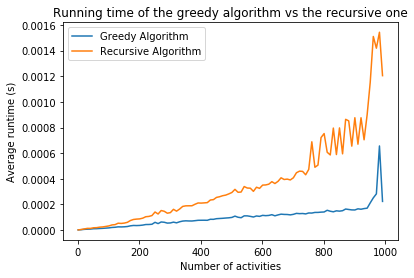

In [151]:
import matplotlib.pyplot as plt

#plotting the data
x = (list(range(1,1000,10)))
plt.plot(x, y1, label = 'Greedy Algorithm') #plotting in one graph
plt.plot(x, y2, label = 'Recursive Algorithm')

plt.title('Running time of the greedy algorithm vs the recursive one') #labeling
plt.xlabel('Number of activities')
plt.ylabel('Average runtime (s)')
plt.legend()

## Question 4. 
Explain the results in question 3.

As we can see, the recursive algorithm has a bigger runtime than the greedy algorithm which might seem surprising until we think about the nature of the problem. One of the main charactersitics of the activity selection problem is that locally optimal solutions to the subproblems lead to the globally optimal solutions and therefore, we do not need to do extra steps of reusing the previously calculated solutions to the subproblems - such aproach is an overdo and we can just use the easier iterative approach and save some time on the unnecessary steps.

## [Optional] Question 5. 
Overload the operator "<" for a comparison between two instances of the class Activity so that A.sort() will sort A, a list of activities, by their finish times.

**This might be very helpful for your final project, so please try this exercise and reach out to the TAs if you'd like to further discuss Overloading in Python**

In [ ]:
import copy
class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
    def __lt__(self, other):
        # YOUR CODE HERE
        raise NotImplementedError()

# Testing code

A = [Activity('1', 0, 2),
     Activity('2', 1, 5),
     Activity('3', 0, 1),
     Activity('4', 5, 6)]

A.sort()

finish_time_list = []

for act in A:
    finish_time_list.append(act.finish)

B = copy.deepcopy(finish_time_list)
B.sort()
B == finish_time_list